## Curve fitting for atomistic models

This notebook describes a solution for fitting eqn 2 in "Multicentered Gaussian-Based Potentials
for Coarse-Grained Polymer Simulations: Linking Atomistic and Mesoscopic Scales"



A multipeaked distribution of a structural parameter $\theta$ can be approximated by a sum of n Gaussian functions characterized by their centers ($\theta_{ci}$), total area ($A_i$), and width ($w_i$):

$$P(\theta)  = \sum _{i=1}^n \frac{A_i}{w_i \sqrt{\pi/2}} exp^{-2 \frac{(\theta -\theta_{ci})^2}{w_i^2}} $$

$P(\theta)$ is computed according to the equation above. 

The cost function for the optimization is defined by the squared sum of residuals:  
i.e. $\sum_j^J (\hat{P}(\theta_j) - P(\theta_{ci})_j)^2 $; where j is the index for the histogram bin-centers to approximate the density function.  

In [10]:
# load dependencies
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splev, splrep

In [2]:
# read the input file with the bond/angle values
input_filename = "sample_data.txt"
step, input_data = np.loadtxt(input_filename, unpack=True, skiprows=1)

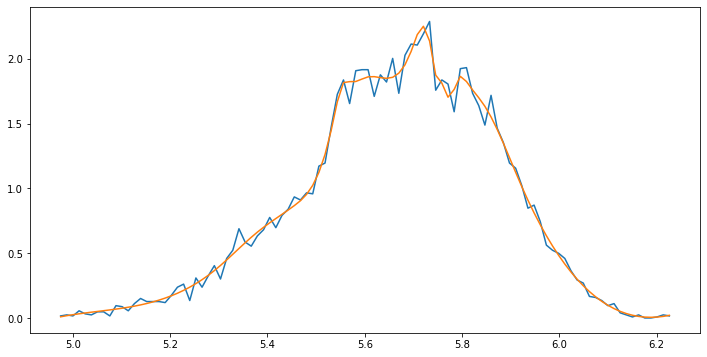

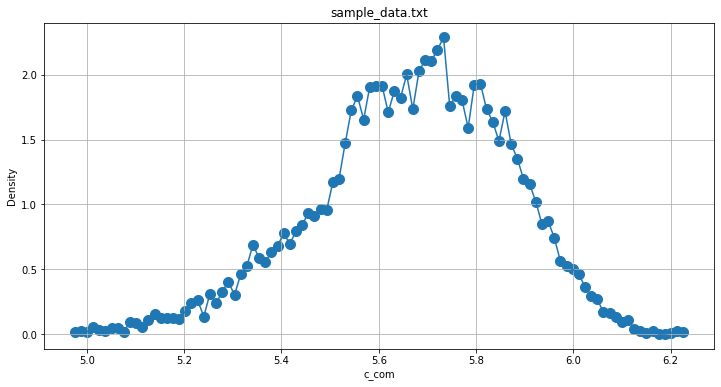

In [19]:
# number of bins to be used in the calculation of the histogram
my_bins = 100

# create the histogram of the raw data
prob_density_distr, bin_edges = np.histogram(input_data, bins=my_bins, density=True)

# create the midpoints of the binning edges
bin_mid_points = np.zeros(my_bins)
for i in range(0, my_bins):
    bin_mid_points[i] = 0.5*(bin_edges[i] + bin_edges[i+1])

# Interpolation
x = bin_mid_points
y = prob_density_distr
spl = splrep(x, y, s=0.4, per=False)
x2 = np.linspace(x[0], x[-1], 100)
y2 = splev(x2, spl)
fig = plt.figure(figsize=(12,6))
plt.plot(x,y,label='data')
plt.plot(x2,y2,label='Interpolation')


# Plot the data density 
fig = plt.figure(figsize=(12,6))
plt.plot(bin_mid_points,prob_density_distr)
plt.scatter(bin_mid_points,prob_density_distr , marker="o",s=100)
plt.xlabel('c_com')
plt.ylabel('Density')
plt.title(input_filename)
plt.grid()
plt.show()


In [4]:
import numpy
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

def gaussian_potential(x, *parameters):
    """function with the gaussian potential"""

    sum_gaussians = 0
    
    for j in range(0, n_gaussians):
        prefactor = parameters[3*j]/(parameters[3*j+1]*numpy.sqrt(numpy.pi/2))
        exponential = numpy.exp((-2*numpy.power(parameters[3*j+2]-x, 2))/numpy.power(parameters[3*j+1], 2))
        sum_gaussians += (prefactor*exponential)

    return sum_gaussians

In [5]:
# number of gaussian functions to be used in the fitting
n_gaussians = 4

#p0 = 0.01*numpy.ones(3*n_gaussians)
n = len(bin_mid_points)                          #the number of data
mean = sum(bin_mid_points*prob_density_distr)/n
sigma = sum(prob_density_distr*(bin_mid_points-mean)**2)/n

if n_gaussians==1:
    p0 = [1, mean, sigma ]
if n_gaussians==2:
    p0 = [1/n_gaussians, mean, sigma, 1/n_gaussians, mean, sigma]
if n_gaussians==3:    
    p0 = [1/n_gaussians, mean, sigma, 1/n_gaussians, mean, sigma, 1/n_gaussians, mean, sigma]
if n_gaussians==4:    
        p0 = [1/n_gaussians, mean, sigma, 1/n_gaussians, mean, sigma, 1/n_gaussians, mean, sigma,1/n_gaussians, mean, sigma]

#popt, pcov = curve_fit(gaussian_potential, bin_mid_points, prob_density_distr, p0,None, False, True, ftol = 0.00001)
popt, pcov = curve_fit(gaussian_potential, bin_mid_points, prob_density_distr,p0)

In [192]:
# sum of squares
def ssq(z):
    return(np.sum(z**2))

In [214]:
RMSE = ssq(gaussian_potential(bin_mid_points, *popt) - prob_density_distr)/my_bins

In [6]:
n = my_bins
alpha =0.05

from scipy.stats import t
par_delta = t.ppf(1-alpha/2, n-1) *(np.sqrt(np.diag(pcov))/np.sqrt(n))
print(popt)
print(par_delta)

[0.03587994 0.05270026 5.70918706 0.50424076 0.24712153 5.80249523
 0.33501279 0.3356737  5.4927524  0.1223296  0.11319406 5.58827896]
[0.002139   0.00187957 0.0007645  0.018878   0.0030471  0.00320093
 0.02551337 0.01300073 0.01385975 0.00856888 0.00321304 0.00096918]


In [8]:
p= popt


p1 = p[:3]
p2 = p[3:6]
p3 = p[6:9]
p4 = p[9:12]


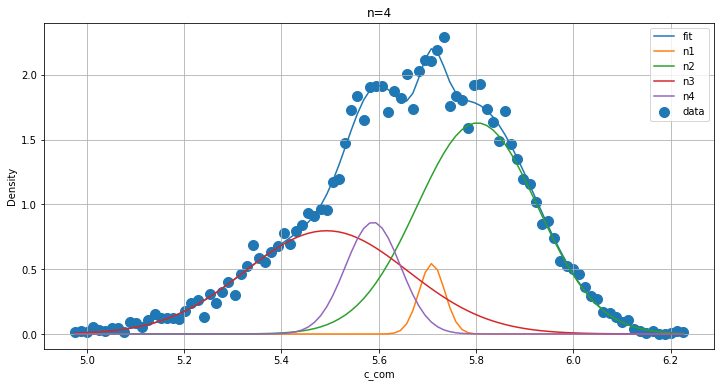

In [9]:
n_gaussians = 4
fig = plt.figure(figsize=(12,6))
plt.plot(bin_mid_points,gaussian_potential(bin_mid_points, *p),label = 'fit')
plt.scatter(bin_mid_points,prob_density_distr,marker="o",s=100,label = 'data')
n_gaussians = 1
plt.plot(bin_mid_points,gaussian_potential(bin_mid_points, *p1),label = 'n1')
n_gaussians = 1
plt.plot(bin_mid_points,gaussian_potential(bin_mid_points, *p2),label = 'n2')
n_gaussians = 1
plt.plot(bin_mid_points,gaussian_potential(bin_mid_points, *p3),label = 'n3')
n_gaussians = 1
plt.plot(bin_mid_points,gaussian_potential(bin_mid_points, *p4),label = 'n4')

plt.xlabel('c_com')
plt.ylabel('Density')
plt.title('n=4')
plt.legend()
plt.grid()
plt.show()